In [392]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [393]:
# Reading the csv file
data = pd.read_csv("cardata.csv")


In [394]:
# Making the dataframe

df = pd.DataFrame(data)
df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [395]:
# Removing the car name feature

df.drop("Car_Name", axis=1, inplace=True)
df


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [396]:
# Numerical features description

df.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [397]:
# String based features description

df[['Fuel_Type',
    'Seller_Type',
    'Transmission', ]].describe()


,Fuel_Type,Seller_Type,Transmission
count,301,301,301
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,195,261


In [398]:
df


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [399]:
# Reordering the columns
df = df[['Year',
         'Present_Price',
         'Kms_Driven',
         'Fuel_Type',
         'Seller_Type',
         'Transmission',
         'Owner',
         'Selling_Price']]
df


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


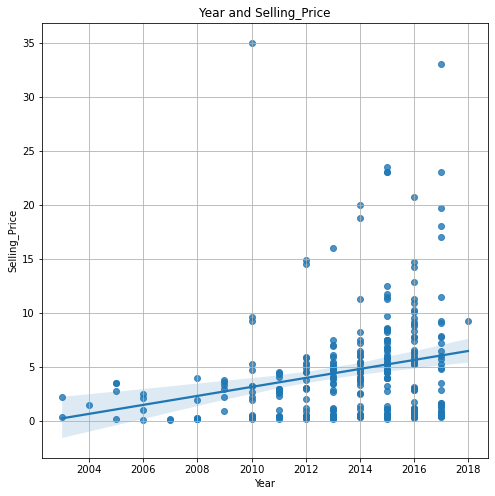

In [400]:
#Year and target

figure = plt.figure(figsize=(8, 8))
x = df.Year
y = df.Selling_Price
sns.regplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


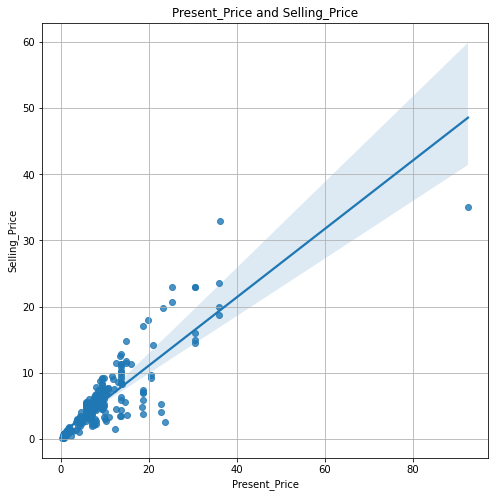

In [401]:
# Present price and target

figure = plt.figure(figsize=(8, 8))
x = df.Present_Price
y = df.Selling_Price
sns.regplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


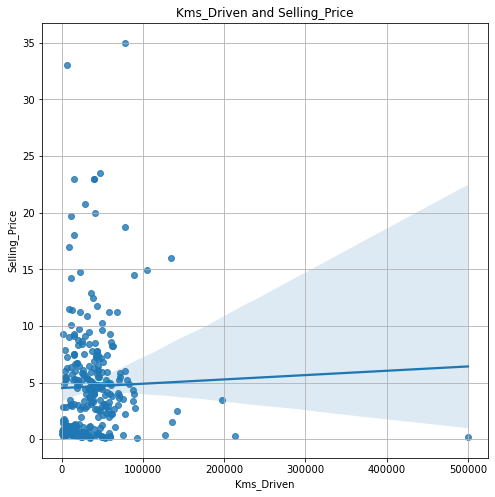

In [402]:
# Kms driven and target

figure = plt.figure(figsize=(8, 8))
x = df.Kms_Driven
y = df.Selling_Price
sns.regplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


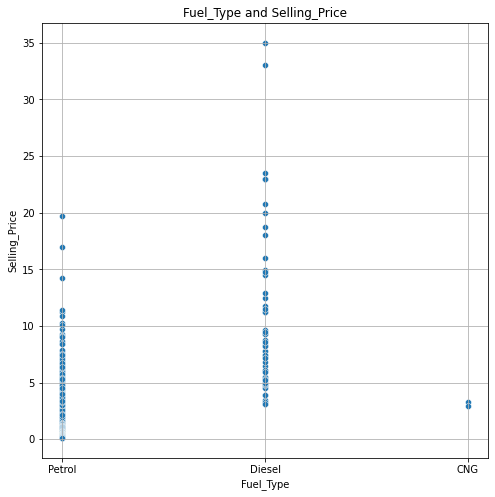

In [403]:
# Fuel Type and target

figure = plt.figure(figsize=(8, 8))
x = df.Fuel_Type
y = df.Selling_Price
sns.scatterplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


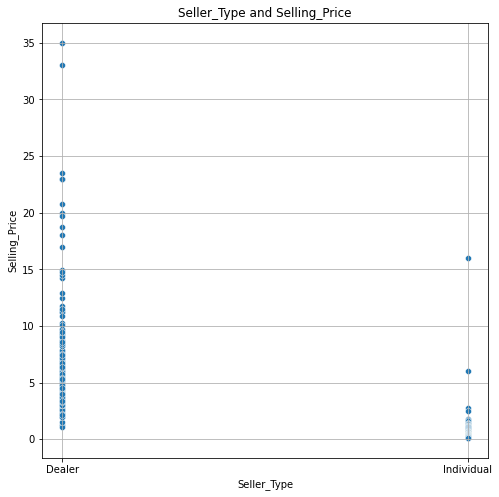

In [404]:
# Seller Type and target

figure = plt.figure(figsize=(8, 8))
x = df.Seller_Type
y = df.Selling_Price
sns.scatterplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


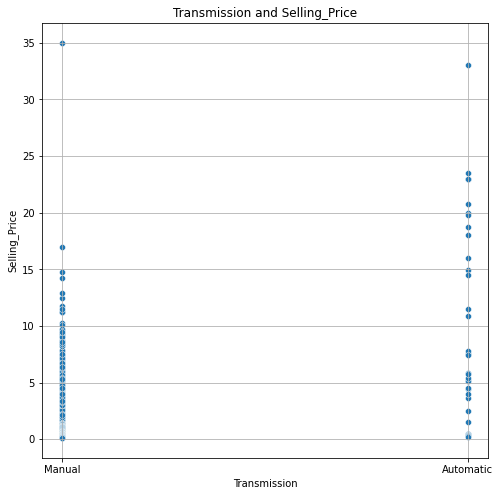

In [405]:
# Transmission Type and target

figure = plt.figure(figsize=(8, 8))
x = df.Transmission
y = df.Selling_Price
sns.scatterplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


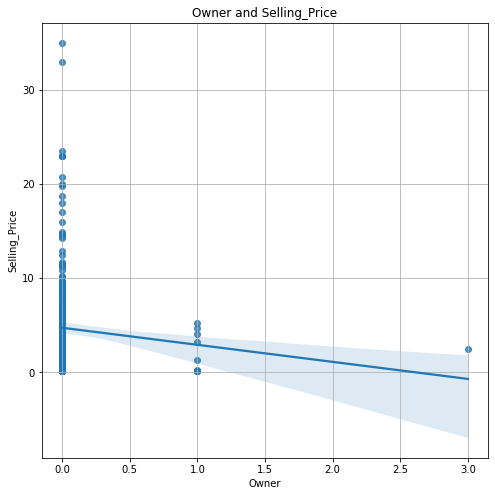

In [406]:
#Owner and target

figure = plt.figure(figsize=(8, 8))
x = df.Owner
y = df.Selling_Price
sns.regplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


# clearing Noises

In [407]:
# Selling price noise checking

df1 = df.copy()
print("Mean Value : ", df1.Selling_Price.mean())
df1.Selling_Price.nlargest(4)


Mean Value :  4.661295681063127


86    35.0
64    33.0
63    23.5
51    23.0
Name: Selling_Price, dtype: float64

In [408]:
df1.iloc[86]


Year               2010
Present_Price      92.6
Kms_Driven        78000
Fuel_Type        Diesel
Seller_Type      Dealer
Transmission     Manual
Owner                 0
Selling_Price      35.0
Name: 86, dtype: object

In [409]:
df1.iloc[64]


Year                  2017
Present_Price        36.23
Kms_Driven            6000
Fuel_Type           Diesel
Seller_Type         Dealer
Transmission     Automatic
Owner                    0
Selling_Price         33.0
Name: 64, dtype: object

In [410]:
# df1.drop(86,inplace=True)
# df1.drop(64,inplace=True)
# df1.drop(196,inplace=True)

#### No acceptable evidence were find to remove two above data

In [411]:
# Kms driven noise checking

# df[df1.Kms_Driven > 400000]
df1.Kms_Driven.nlargest(1)

196    500000
Name: Kms_Driven, dtype: int64

#### No noise were found

# Preprocessing for modeling

In [412]:
# Current year

now = df1.Year.max() + 1
now


2019

In [413]:
# Calculating the age

def Age(year):
    return now - year


age = df1.Year.apply(Age)
AGE = pd.DataFrame(columns=["Age"])
AGE.Age = age
df1.insert(1, "Age", AGE)
df1.head()


,Year,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,2013,6,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,2017,2,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,2011,8,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,2014,5,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [414]:
# Converting string features to numbers
'''
Fuel Type : CNG = 1,Diesel = 2,Petrol = 3
Seller Type : Dealer = 1,Individual = 2
Transmission : Automatic = 1,Manual = 2

'''


def fuel_convert(fuel):
    if fuel == "CNG":
        return 1
    elif fuel == "Diesel":
        return 2
    elif fuel == "Petrol":
        return 3


def seller_convert(seller):
    if seller == "Dealer":
        return 1
    elif seller == "Individual":
        return 2


def transmission_convert(transmission):
    if transmission == "Automatic":
        return 1
    elif transmission == "Manual":
        return 2


df1.Fuel_Type = df1.Fuel_Type.apply(fuel_convert)
df1.Seller_Type = df1.Seller_Type.apply(seller_convert)
df1.Transmission = df1.Transmission.apply(transmission_convert)


In [415]:
DF = df1.dropna()


In [416]:
x = pd.DataFrame(DF, columns=[
    'Age',
    'Present_Price',
    'Kms_Driven',
    'Fuel_Type',
    'Seller_Type',
    'Transmission',
    'Owner'])
y = DF.Selling_Price.values.reshape(-1, 1)


In [417]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


<AxesSubplot:>

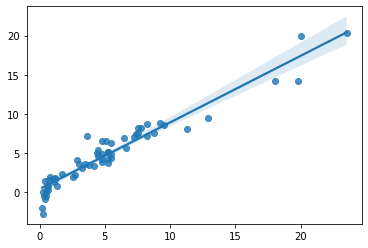

In [418]:
sns.regplot(x=y_test, y=y_pred)


In [419]:
test = x_test.copy()
test.insert(7, "y_pred", y_pred)
test.insert(8, "y_test", y_test)


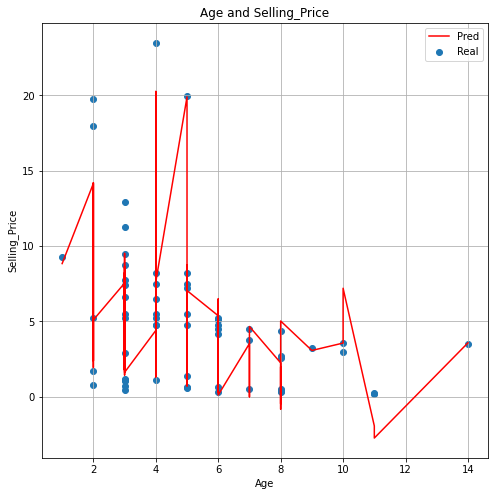

In [420]:
feature = "Age"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.plot(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


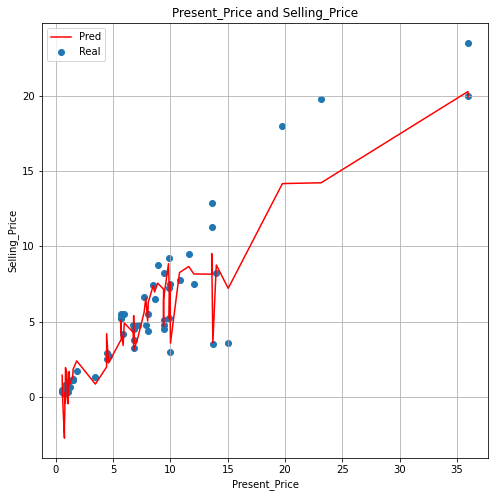

In [421]:
feature = "Present_Price"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.plot(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


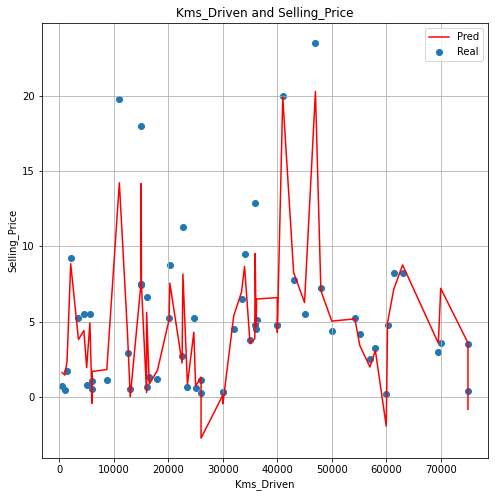

In [422]:
feature = "Kms_Driven"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.plot(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


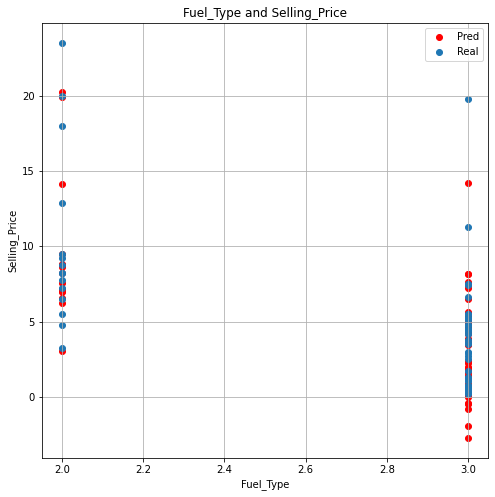

In [423]:
feature = "Fuel_Type"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.scatter(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


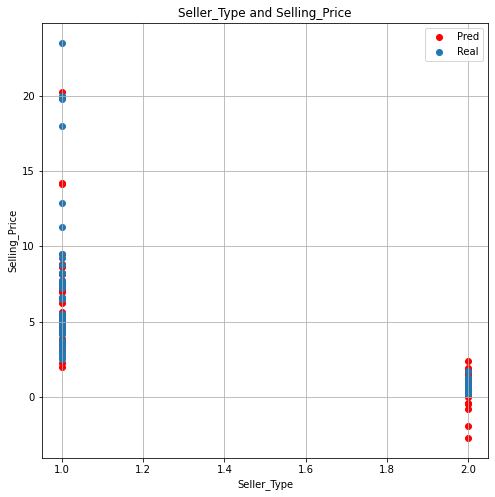

In [424]:
feature = "Seller_Type"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.scatter(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


In [425]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score : ", metrics.r2_score(y_test, y_pred))


Mean Absolute Error :  1.000032601214773
Mean Squared Error :  2.1885564456585125
Root Mean Squared Error :  1.4793770464822389
R2 Score :  0.913418172122418


In [426]:
DF.insert((len(DF.columns)-2),"log(Present_Price)",np.log(DF.Present_Price))
DF
columns = DF.columns.tolist()
columns.remove("Year")
columns.remove("Selling_Price")
dftest = DF.copy()
for i in range(2,3):
    print("==============================================")
    print("Order = "+str(i))
    for c in columns :
        tmp = dftest[c]**i
        dftest.insert((len(dftest.columns)-2),(c+str(i)),tmp)
    traincolumns = dftest.columns.tolist()
    traincolumns.remove("Year")
    traincolumns.remove("Selling_Price")
    x=dftest[traincolumns]
    x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error : ", np.sqrt(
        metrics.mean_squared_error(y_test, y_pred)))
    print("R2 Score : ", metrics.r2_score(y_test, y_pred))
    
    

Order = 2
Mean Absolute Error :  1.082349932637987
Mean Squared Error :  1.85303269662015
Root Mean Squared Error :  1.3612614358087685
R2 Score :  0.9266918802535051


In [427]:
np.log(dftest.Present_Price)


0      1.720979
1      2.255493
2      2.287471
3      1.423108
4      1.927164
         ...   
296    2.451005
297    1.774952
298    2.397895
299    2.525729
300    1.774952
Name: Present_Price, Length: 301, dtype: float64

In [428]:

DF

,Year,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5,1.720979,27000,3,1,2,0,3.35
1,2013,6,2.255493,43000,2,1,2,0,4.75
2,2017,2,2.287471,6900,3,1,2,0,7.25
3,2011,8,1.423108,5200,3,1,2,0,2.85
4,2014,5,1.927164,42450,2,1,2,0,4.60
...,...,...,...,...,...,...,...,...,...
296,2016,3,2.451005,33988,2,1,2,0,9.50
297,2015,4,1.774952,60000,3,1,2,0,4.00
298,2009,10,2.397895,87934,3,1,2,0,3.35
299,2017,2,2.525729,9000,2,1,2,0,11.50
